Exploring the dailyActivity_merged Dataset of our Project

In [2]:
import pandas as pd

filePath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/heartrate_seconds_merged.csv'
dfHeartRateSeconds = pd.read_csv(filePath)
# displaying the first few rows of our datset.
print(dfHeartRateSeconds.head())

           Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101


In [3]:
# Displaying the basic information about the dataset
print(dfHeartRateSeconds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB
None


In [4]:
# Displaying the summary statistics of numeric columns
print(dfHeartRateSeconds.describe())

                 Id         Value
count  2.483658e+06  2.483658e+06
mean   5.513765e+09  7.732842e+01
std    1.950224e+09  1.940450e+01
min    2.022484e+09  3.600000e+01
25%    4.388162e+09  6.300000e+01
50%    5.553957e+09  7.300000e+01
75%    6.962181e+09  8.800000e+01
max    8.877689e+09  2.030000e+02


In [5]:
# Displaying the names of all columns
print(dfHeartRateSeconds.columns)

Index(['Id', 'Time', 'Value'], dtype='object')


Data Preprocessing

In [6]:
# Checking for missing values in each column
print(dfHeartRateSeconds.isnull().sum())

Id       0
Time     0
Value    0
dtype: int64


In [6]:
# Explore unique values in a specific columns
print(dfHeartRateSeconds['Id'].unique())
print(dfHeartRateSeconds['Time'].unique())
print(dfHeartRateSeconds['Value'].unique())

[2022484408 2026352035 2347167796 4020332650 4388161847 4558609924
 5553957443 5577150313 6117666160 6775888955 6962181067 7007744171
 8792009665 8877689391]
['4/12/2016 7:21:00 AM' '4/12/2016 7:21:05 AM' '4/12/2016 7:21:10 AM' ...
 '5/12/2016 2:44:03 PM' '5/12/2016 2:44:18 PM' '5/12/2016 2:44:28 PM']
[ 97 102 105 103 101  95  91  93  94  92  89  83  61  60  57  54  55  58
  59  56  52  53  62  64  66  67  68  70  74  75  76  78  71  72  82  81
  79  84  86  87  88  80  77  90  85  96  98 100  99 107 104 108 106 110
 112 111  73  63  65  69 114 115 116 117 118 113 109 119 120 121 122 123
 124 125 127 128 130 129 132 133 134 131 138 144 148 150 152 153 154 156
 155 149 147 141 139 136 135 126 137 140 142 143 145  51  50 146 157 164
 171 178 184 189 188 185 183 182 175 172 168 166 173 169 161 160  49 151
 159 158 162 165 200 202 203 201 199 198 197 195 194 193 181 180 177 176
 167 192 170 163  45  42  41  43  44  40  38  39  48  46  47 191 187 179
 174 190 186 196  36  37]


In [7]:
# Checking for duplicate rows
duplicates = dfHeartRateSeconds.duplicated()
print("Number of Duplicate Rows:", duplicates.sum())

duplicate_rows = dfHeartRateSeconds[duplicates]
print("\nAs No Duplicate Rows:")
print(duplicate_rows)

# Removing the Duplicate Rows
dfHeartRateSeconds = dfHeartRateSeconds.drop_duplicates()

# Verifying afterwards
print("\nNo Existing Duplicates:")
print("Total Number of Rows:", len(dfHeartRateSeconds))

Number of Duplicate Rows: 0

As No Duplicate Rows:
Empty DataFrame
Columns: [Id, Time, Value]
Index: []

No Existing Duplicates:
Total Number of Rows: 2483658


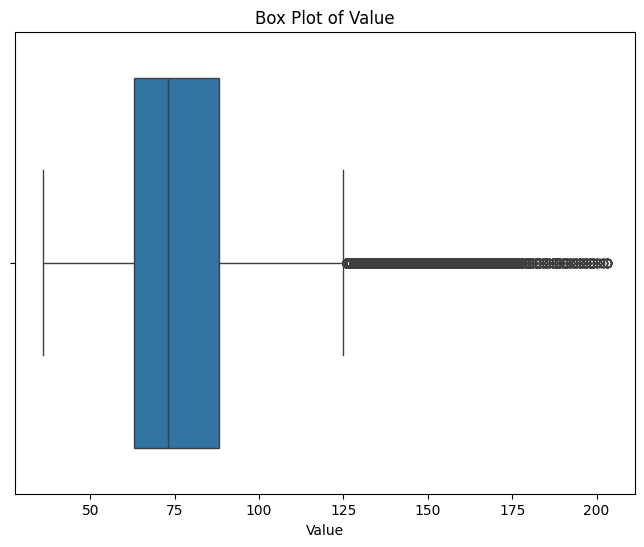

In [8]:
# Visualizing the outliers for the "Value" column.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfHeartRateSeconds['Value'])
plt.title('Box Plot of Value')
plt.show()

Handling the Outliers Separately on Features

1. Value

In [9]:
# We are applying capping
ValueUpperlimit = 125

dfHeartRateSeconds['Value'] = dfHeartRateSeconds['Value'].clip(upper=ValueUpperlimit)
print("Capped Value:")
print(dfHeartRateSeconds['Value'].describe())

Capped Value:
count    2.483658e+06
mean     7.684317e+01
std      1.777172e+01
min      3.600000e+01
25%      6.300000e+01
50%      7.300000e+01
75%      8.800000e+01
max      1.250000e+02
Name: Value, dtype: float64


In [10]:
# Displaying summary statistics of all columns
print(dfHeartRateSeconds.describe())

                 Id         Value
count  2.483658e+06  2.483658e+06
mean   5.513765e+09  7.684317e+01
std    1.950224e+09  1.777172e+01
min    2.022484e+09  3.600000e+01
25%    4.388162e+09  6.300000e+01
50%    5.553957e+09  7.300000e+01
75%    6.962181e+09  8.800000e+01
max    8.877689e+09  1.250000e+02


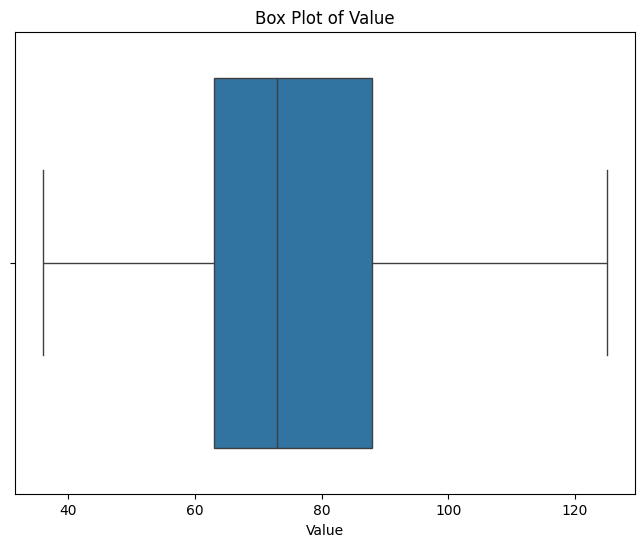

In [11]:
# Visualizing the outliers for the "Value" column.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfHeartRateSeconds['Value'])
plt.title('Box Plot of Value')
plt.show()

In [12]:
# df_daily_activity is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/heartrate_seconds_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
dfHeartRateSeconds.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/heartrate_seconds_merged_Filtered.csv
